In [76]:
# %pushd book-materials
import numpy as np
import pandas as pd
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
pd.options.display.max_columns = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

# Combining and Merging Data Sets

In [77]:
data = pd.Series(np.random.uniform(size=9),
                 index=[["a", "a", "a", "b", "b", "c", "c", "d", "d"],
                        [1, 2, 3, 1, 3, 1, 2, 2, 3]])
data

a  1    0.929616
   2    0.316376
   3    0.183919
b  1    0.204560
   3    0.567725
c  1    0.595545
   2    0.964515
d  2    0.653177
   3    0.748907
dtype: float64

In [78]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [79]:
data["b"]

1    0.204560
3    0.567725
dtype: float64

In [82]:
data["b":"d"]

b  1    0.204560
   3    0.567725
c  1    0.595545
   2    0.964515
d  2    0.653177
   3    0.748907
dtype: float64

In [81]:
data.loc[["b", "d"]]

b  1    0.204560
   3    0.567725
d  2    0.653177
   3    0.748907
dtype: float64

In [83]:
data.loc[:, 2]

a    0.316376
c    0.964515
d    0.653177
dtype: float64

In [84]:
data.unstack()

,1,2,3
a,0.929616,0.316376,0.183919
b,0.204560,NaN,0.567725
c,0.595545,0.964515,NaN
d,NaN,0.653177,0.748907


In [85]:
data.unstack().stack()

a  1    0.929616
   2    0.316376
   3    0.183919
b  1    0.204560
   3    0.567725
c  1    0.595545
   2    0.964515
d  2    0.653177
   3    0.748907
dtype: float64

In [86]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[["a", "a", "b", "b"], [1, 2, 1, 2]],
                     columns=[["Ohio", "Ohio", "Colorado"],
                              ["Green", "Red", "Green"]])
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [87]:
frame.index.names = ["key1", "key2"]
frame.columns.names = ["state", "color"]
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [88]:
frame.index.nlevels #nlevels

2

In [11]:
frame["Ohio"]

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

In [12]:
frame.swaplevel("key1", "key2") #swaplevel()

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [91]:
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [113]:
frame.sort_index(level=1) #level=1 second level of the row index, ie, key2

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11

In [115]:
frame.sort_index(level=0) #level=0 first level of the row index, ie, key1

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [114]:
frame.swaplevel(0, 1).sort_index(level=0) #level=0 first level of the row index, ie, key1

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

In [117]:
frame.groupby(level="key2").sum()

state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

In [118]:
frame.groupby(level="color", axis="columns").sum() #both levels

color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

In [119]:
frame = pd.DataFrame({"a": range(7), "b": range(7, 0, -1),
                      "c": ["one", "one", "one", "two", "two",
                            "two", "two"],
                      "d": [0, 1, 2, 0, 1, 2, 3]})
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [120]:
frame2 = frame.set_index(["c", "d"])
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [121]:
frame.set_index(["c", "d"], drop=False) #drop=False will remain columns whilst having them as indices

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

In [122]:
frame2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


# Database-style DataFrame Merges

In [96]:
df1 = pd.DataFrame({"key": ["b", "b", "a", "c", "a", "a", "b"],
                    "data1": pd.Series(range(7), dtype="Int64")})
df2 = pd.DataFrame({"key": ["a", "b", "d"],
                    "data2": pd.Series(range(3), dtype="Int64")})
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [97]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [99]:
# This is an example of a many-to-one merge situation; the data in df1 has multiple rows labeled a and b, whereas df2 
# has only one row for each value in the key column

# If not specified, merge uses the overlapping column names as the keys
pd.merge(df1, df2) #By default merge does an 'inner' join

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [100]:
pd.merge(df1, df2, on="key") #It’s a good practice to specify the column to join on explicitly. how='inner' by default

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [101]:
df3 = pd.DataFrame({"lkey": ["b", "b", "a", "c", "a", "a", "b"],
                    "data1": pd.Series(range(7), dtype="Int64")})
df4 = pd.DataFrame({"rkey": ["a", "b", "d"],
                    "data2": pd.Series(range(3), dtype="Int64")})
pd.merge(df3, df4, left_on="lkey", right_on="rkey")

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


In [103]:
pd.merge(df1, df2, how="outer")

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0
6,c,3,<NA>
7,d,<NA>,2


In [23]:
pd.merge(df3, df4, left_on="lkey", right_on="rkey", how="outer")

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0
6,c,3,NaN,<NA>
7,NaN,<NA>,d,2


In [104]:
df1 = pd.DataFrame({"key": ["b", "b", "a", "c", "a", "b"],
                    "data1": pd.Series(range(6), dtype="Int64")})
df2 = pd.DataFrame({"key": ["a", "b", "a", "b", "d"],
                    "data2": pd.Series(range(5), dtype="Int64")})
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [105]:
df2

,key,data2
0,a,0
1,b,1
2,a,2
3,b,3
4,d,4


In [106]:
# Many-to-many merges 
pd.merge(df1, df2, on="key", how="left")

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,a,2,0
5,a,2,2
6,c,3,<NA>
7,a,4,0
8,a,4,2
9,b,5,1


In [107]:
pd.merge(df1, df2, how="inner")

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


In [109]:
left = pd.DataFrame({"key1": ["foo", "foo", "bar"],
                     "key2": ["one", "two", "one"],
                     "lval": pd.Series([1, 2, 3], dtype='Int64')})
left

,key1,key2,lval
0,foo,one,1
1,foo,two,2
2,bar,one,3


In [110]:
right = pd.DataFrame({"key1": ["foo", "foo", "bar", "bar"],
                      "key2": ["one", "one", "one", "two"],
                      "rval": pd.Series([4, 5, 6, 7], dtype='Int64')})
right

,key1,key2,rval
0,foo,one,4
1,foo,one,5
2,bar,one,6
3,bar,two,7


In [108]:
# To merge with multiple keys, pass a list of column names
pd.merge(left, right, on=["key1", "key2"], how="outer")

,key1,key2,lval,rval
0,foo,one,1,4
1,foo,one,1,5
2,foo,two,2,<NA>
3,bar,one,3,6
4,bar,two,<NA>,7


In [27]:
pd.merge(left, right, on="key1")

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [111]:
#suffixes
pd.merge(left, right, on="key1", suffixes=("_left", "_right"))

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


# Merging on Index

In [123]:
left1 = pd.DataFrame({"key": ["a", "b", "a", "a", "b", "c"],
                      "value": pd.Series(range(6), dtype="Int64")})
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [124]:
right1 = pd.DataFrame({"group_val": [3.5, 7]}, index=["a", "b"])
right1

,group_val
a,3.5
b,7.0


In [125]:
# pass left_index=True or right_index=True (or both) to indicate that the index should be used as the merge key
#left_on=, right_index; or left_index=, right_on; left_on, right_on; left_index=,right_index=
pd.merge(left1, right1, left_on="key", right_index=True) 

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [30]:
pd.merge(left1, right1, left_on="key", right_index=True, how="outer")

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


In [127]:
lefth = pd.DataFrame({"key1": ["Ohio", "Ohio", "Ohio",
                               "Nevada", "Nevada"],
                      "key2": [2000, 2001, 2002, 2001, 2002],
                      "data": pd.Series(range(5), dtype="Int64")})
lefth

,key1,key2,data
0,Ohio,2000,0
1,Ohio,2001,1
2,Ohio,2002,2
3,Nevada,2001,3
4,Nevada,2002,4


In [128]:
righth_index = pd.MultiIndex.from_arrays(
    [
        ["Nevada", "Nevada", "Ohio", "Ohio", "Ohio", "Ohio"],
        [2001, 2000, 2000, 2000, 2001, 2002]
    ]
)
righth = pd.DataFrame({"event1": pd.Series([0, 2, 4, 6, 8, 10], dtype="Int64",
                                           index=righth_index),
                       "event2": pd.Series([1, 3, 5, 7, 9, 11], dtype="Int64",
                                           index=righth_index)})

righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [129]:
#merge on multi columns and hierarchical index
pd.merge(lefth, righth, left_on=["key1", "key2"], right_index=True)

,key1,key2,data,event1,event2
0,Ohio,2000,0,4,5
0,Ohio,2000,0,6,7
1,Ohio,2001,1,8,9
2,Ohio,2002,2,10,11
3,Nevada,2001,3,0,1


In [130]:
pd.merge(lefth, righth, left_on=["key1", "key2"],
         right_index=True, how="outer")

,key1,key2,data,event1,event2
0,Ohio,2000,0,4,5
0,Ohio,2000,0,6,7
1,Ohio,2001,1,8,9
2,Ohio,2002,2,10,11
3,Nevada,2001,3,0,1
4,Nevada,2002,4,<NA>,<NA>
4,Nevada,2000,<NA>,2,3


In [132]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
                     index=["a", "c", "e"],
                     columns=["Ohio", "Nevada"]).astype("Int64")
left2

,Ohio,Nevada
a,1,2
c,3,4
e,5,6


In [133]:
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                      index=["b", "c", "d", "e"],
                      columns=["Missouri", "Alabama"]).astype("Int64")
right2

,Missouri,Alabama
b,7,8
c,9,10
d,11,12
e,13,14


In [134]:
pd.merge(left2, right2, how="outer", left_index=True, right_index=True)

,Ohio,Nevada,Missouri,Alabama
a,1,2,<NA>,<NA>
b,<NA>,<NA>,7,8
c,3,4,9,10
d,<NA>,<NA>,11,12
e,5,6,13,14


In [135]:
# DataFrame has a more convenient join instance for merging by index
left2.join(right2, how="outer")

,Ohio,Nevada,Missouri,Alabama
a,1,2,<NA>,<NA>
b,<NA>,<NA>,7,8
c,3,4,9,10
d,<NA>,<NA>,11,12
e,5,6,13,14


In [140]:
left2.join(right2,how='left')

,Ohio,Nevada,Missouri,Alabama
a,1,2,<NA>,<NA>
c,3,4,9,10
e,5,6,13,14


In [141]:
left1.join(right1, on="key")

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


In [139]:
left1.join(right1)

,key,value,group_val
0,a,0,NaN
1,b,1,NaN
2,a,2,NaN
3,a,3,NaN
4,b,4,NaN
5,c,5,NaN


In [146]:
another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                       index=["a", "c", "e", "f"],
                       columns=["New York", "Oregon"])
another

,New York,Oregon
a,7.0,8.0
c,9.0,10.0
e,11.0,12.0
f,16.0,17.0


In [151]:
left2.join(right2)

,Ohio,Nevada,Missouri,Alabama
a,1,2,<NA>,<NA>
c,3,4,9,10
e,5,6,13,14


In [148]:
# pass a list of DataFrames to join as an alternative to using the more general concat function described below
left2.join([right2, another]) #a list of DFs. concatenate 3 DFs

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1,2,<NA>,<NA>,7.0,8.0
c,3,4,9,10,9.0,10.0
e,5,6,13,14,11.0,12.0


In [153]:
left2.join([right2, another], how="outer")

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1,2,<NA>,<NA>,7.0,8.0
c,3,4,9,10,9.0,10.0
e,5,6,13,14,11.0,12.0
b,<NA>,<NA>,7,8,NaN,NaN
d,<NA>,<NA>,11,12,NaN,NaN
f,<NA>,<NA>,<NA>,<NA>,16.0,17.0


# Concatenating Along an Axis

In [154]:
arr = np.arange(12).reshape((3, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [37]:
np.concatenate([arr, arr], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [155]:
np.concatenate([arr, arr], axis=0)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [159]:
s1 = pd.Series([0, 1], index=["a", "b"], dtype="Int64")
s1

a    0
b    1
dtype: Int64

In [160]:
s2 = pd.Series([2, 3, 4], index=["c", "d", "e"], dtype="Int64")
s2

c    2
d    3
e    4
dtype: Int64

In [161]:
s3 = pd.Series([5, 6], index=["f", "g"], dtype="Int64")
s3

f    5
g    6
dtype: Int64

In [163]:
#concat a list of series. axis=0 along rows by default
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: Int64

In [164]:
pd.concat([s1,s2,s3], axis=1)

,0,1,2
a,0,<NA>,<NA>
b,1,<NA>,<NA>
c,<NA>,2,<NA>
d,<NA>,3,<NA>
e,<NA>,4,<NA>
f,<NA>,<NA>,5
g,<NA>,<NA>,6


In [165]:
pd.concat([s1, s2, s3], axis="columns")

,0,1,2
a,0,<NA>,<NA>
b,1,<NA>,<NA>
c,<NA>,2,<NA>
d,<NA>,3,<NA>
e,<NA>,4,<NA>
f,<NA>,<NA>,5
g,<NA>,<NA>,6


In [166]:
s4 = pd.concat([s1, s3])
s4

a    0
b    1
f    5
g    6
dtype: Int64

In [167]:
pd.concat([s1, s4], axis="columns")

,0,1
a,0,0
b,1,1
f,<NA>,5
g,<NA>,6


In [168]:
pd.concat([s1, s4], axis="columns", join="inner")

,0,1
a,0,0
b,1,1


In [177]:
# Identify concatenated pieces using keys= to create a hierarchical index on the concatenation axis
result = pd.concat([s1, s1, s3], keys=["one", "two", "three"]) #by default axis=0
result

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: Int64

In [178]:
result.unstack()

,a,b,f,g
one,0,1,<NA>,<NA>
two,0,1,<NA>,<NA>
three,<NA>,<NA>,5,6


In [179]:
pd.concat([s1, s1, s3], axis="columns", keys=["one", "two", "three"]) #axis=1 or axis='columns'

,one,two,three
a,0,0,<NA>
b,1,1,<NA>
f,<NA>,<NA>,5
g,<NA>,<NA>,6


In [181]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=["a", "b", "c"],
                   columns=["one", "two"])
df1

,one,two
a,0,1
b,2,3
c,4,5


In [182]:
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index=["a", "c"],
                   columns=["three", "four"])
df2

,three,four
a,5,6
c,7,8


In [183]:
pd.concat([df1, df2], axis="columns", keys=["level1", "level2"])

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [186]:
# pass a dict of objects instead of a list, the dict’s keys will be used for the keys option:
pd.concat({"level1": df1, "level2": df2}, axis="columns")

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [46]:
#names arguments
pd.concat([df1, df2], axis="columns", keys=["level1", "level2"],
          names=["upper", "lower"])

upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

In [189]:
df1 = pd.DataFrame(np.random.standard_normal((3, 4)),
                   columns=["a", "b", "c", "d"])
df1

,a,b,c,d
0,1.248804,0.774191,-0.319657,-0.624964
1,1.078814,0.544647,0.855588,1.343268
2,-0.267175,1.793095,-0.652929,-1.886837


In [190]:
df2 = pd.DataFrame(np.random.standard_normal((2, 3)),
                   columns=["b", "d", "a"])
df2

,b,d,a
0,1.059626,0.644448,-0.007799
1,-0.449204,2.448963,0.667226


In [192]:
pd.concat([df1, df2]) #ignore_index = False by default

,a,b,c,d
0,1.248804,0.774191,-0.319657,-0.624964
1,1.078814,0.544647,0.855588,1.343268
2,-0.267175,1.793095,-0.652929,-1.886837
0,-0.007799,1.059626,NaN,0.644448
1,0.667226,-0.449204,NaN,2.448963


In [191]:
pd.concat([df1, df2], ignore_index=True) #ignore_index=True

,a,b,c,d
0,1.248804,0.774191,-0.319657,-0.624964
1,1.078814,0.544647,0.855588,1.343268
2,-0.267175,1.793095,-0.652929,-1.886837
3,-0.007799,1.059626,NaN,0.644448
4,0.667226,-0.449204,NaN,2.448963


# Combining Data with Overlap

In [194]:
a = pd.Series([np.nan, 2.5, 0.0, 3.5, 4.5, np.nan], #np.nan
              index=["f", "e", "d", "c", "b", "a"])
a

f    NaN
e    2.5
d    0.0
c    3.5
b    4.5
a    NaN
dtype: float64

In [204]:
b = pd.Series([0., np.nan, 2., np.nan, np.nan, 5.],
              index=["a", "b", "c", "d", "e", "f"])
b

a    0.0
b    NaN
c    2.0
d    NaN
e    NaN
f    5.0
dtype: float64

In [199]:
b[-1] = np.nan
b

a    0.0
b    NaN
c    2.0
d    NaN
e    NaN
f    NaN
dtype: float64

In [200]:
#two datasets whose indexes overlap in full or part, np.where() 
np.where(pd.isna(a), b, a)

array([0. , 2.5, 0. , 3.5, 4.5, nan])

In [209]:
a

f    NaN
e    2.5
d    0.0
c    3.5
b    4.5
a    NaN
dtype: float64

In [207]:
c = pd.Series(np.arange(len(a), dtype=np.float64), index=['f', 'e', 'd', 'c', 'b', 'a'])
c

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    5.0
dtype: float64

In [208]:
np.where(pd.isna(a),c,a)

array([0. , 2.5, 0. , 3.5, 4.5, 5. ])

In [50]:
#combine_first()
a.combine_first(b)

a    0.0
b    4.5
c    3.5
d    0.0
e    2.5
f    5.0
dtype: float64

In [201]:
df1 = pd.DataFrame({"a": [1., np.nan, 5., np.nan],
                    "b": [np.nan, 2., np.nan, 6.],
                    "c": range(2, 18, 4)})
df1

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [202]:
df2 = pd.DataFrame({"a": [5., 4., np.nan, 3., 7.],
                    "b": [np.nan, 3., 4., 6., 8.]})
df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


In [203]:
# combine_first() is “patching” missing data in the calling object with data from the object you pass
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


# Reshaping and Pivoting

# Reshaping with Hierarchical Indexing

In [210]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                    index=pd.Index(["Ohio", "Colorado"], name="state"),
                    columns=pd.Index(["one", "two", "three"],
                    name="number"))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [216]:
result = data.stack()
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64

In [212]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [219]:
result.unstack(level=1)

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [217]:
result.unstack(level=0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [218]:
result.unstack(level="state")

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [220]:
s1 = pd.Series([0, 1, 2, 3], index=["a", "b", "c", "d"], dtype="Int64")
s2 = pd.Series([4, 5, 6], index=["c", "d", "e"], dtype="Int64")
data2 = pd.concat([s1, s2], keys=["one", "two"])
data2

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: Int64

In [221]:
data2.unstack()

,a,b,c,d,e
one,0,1,2,3,<NA>
two,<NA>,<NA>,4,5,6


In [222]:
data2.unstack().stack() # dropna=True by default

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: Int64

In [223]:
data2.unstack().stack(dropna=False)

one  a       0
     b       1
     c       2
     d       3
     e    <NA>
two  a    <NA>
     b    <NA>
     c       4
     d       5
     e       6
dtype: Int64

In [224]:
df = pd.DataFrame({"left": result, "right": result + 5},
                  columns=pd.Index(["left", "right"], name="side"))
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [225]:
df.unstack(level="state")

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

In [226]:
df.unstack(level="state")

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

In [228]:
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [227]:
df.unstack(level="state").stack(level="side")

state         Colorado  Ohio
number side                 
one    left          3     0
       right         8     5
two    left          4     1
       right         9     6
three  left          5     2
       right        10     7

# Pivoting “long” to “wide” Format

In [242]:
data = pd.read_csv("examples/macrodata.csv")
data = data.loc[:, ["year", "quarter", "realgdp", "infl", "unemp"]]
data.head()

,year,quarter,realgdp,infl,unemp
0,1959,1,2710.349,0.00,5.8
1,1959,2,2778.801,2.34,5.1
2,1959,3,2775.488,2.74,5.3
3,1959,4,2785.204,0.27,5.6
4,1960,1,2847.699,2.31,5.2


In [243]:
#pop() removes the 'year' and 'quarter' columns from data DF
periods = pd.PeriodIndex(year=data.pop("year"), 
                         quarter=data.pop("quarter"),
                         name="date")
periods

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', name='date', length=203, freq='Q-DEC')

In [244]:
data.head() #'year' and 'quarter' columns removed

,realgdp,infl,unemp
0,2710.349,0.00,5.8
1,2778.801,2.34,5.1
2,2775.488,2.74,5.3
3,2785.204,0.27,5.6
4,2847.699,2.31,5.2


In [245]:
data.index = periods.to_timestamp("D") #replaced integer index to date index
data.head()

,realgdp,infl,unemp
date,,,
1959-01-01,2710.349,0.00,5.8
1959-04-01,2778.801,2.34,5.1
1959-07-01,2775.488,2.74,5.3
1959-10-01,2785.204,0.27,5.6
1960-01-01,2847.699,2.31,5.2


In [246]:
data = data.reindex(columns=["realgdp", "infl", "unemp"])
data.columns.name = "item"
data.head()

item,realgdp,infl,unemp
date,,,
1959-01-01,2710.349,0.00,5.8
1959-04-01,2778.801,2.34,5.1
1959-07-01,2775.488,2.74,5.3
1959-10-01,2785.204,0.27,5.6
1960-01-01,2847.699,2.31,5.2


In [249]:
data.stack()

date        item   
1959-01-01  realgdp     2710.349
            infl           0.000
            unemp          5.800
1959-04-01  realgdp     2778.801
            infl           2.340
                         ...    
2009-04-01  infl           3.370
            unemp          9.200
2009-07-01  realgdp    12990.341
            infl           3.560
            unemp          9.600
Length: 609, dtype: float64

In [252]:
data.stack().reset_index()

,date,item,0
0,1959-01-01,realgdp,2710.349
1,1959-01-01,infl,0.000
2,1959-01-01,unemp,5.800
3,1959-04-01,realgdp,2778.801
4,1959-04-01,infl,2.340
...,...,...,...
604,2009-04-01,infl,3.370
605,2009-04-01,unemp,9.200
606,2009-07-01,realgdp,12990.341
607,2009-07-01,infl,3.560


In [253]:
long_data = (data.stack().reset_index().rename(columns={0: "value"}))
long_data.head()

,date,item,value
0,1959-01-01,realgdp,2710.349
1,1959-01-01,infl,0.000
2,1959-01-01,unemp,5.800
3,1959-04-01,realgdp,2778.801
4,1959-04-01,infl,2.340


In [254]:
long_data[:10]

,date,item,value
0,1959-01-01,realgdp,2710.349
1,1959-01-01,infl,0.000
2,1959-01-01,unemp,5.800
3,1959-04-01,realgdp,2778.801
4,1959-04-01,infl,2.340
5,1959-04-01,unemp,5.100
6,1959-07-01,realgdp,2775.488
7,1959-07-01,infl,2.740
8,1959-07-01,unemp,5.300
9,1959-10-01,realgdp,2785.204


In [255]:
pivoted = long_data.pivot(index="date", columns="item",
                          values="value")
pivoted.head()

item,infl,realgdp,unemp
date,,,
1959-01-01,0.00,2710.349,5.8
1959-04-01,2.34,2778.801,5.1
1959-07-01,2.74,2775.488,5.3
1959-10-01,0.27,2785.204,5.6
1960-01-01,2.31,2847.699,5.2


In [256]:
long_data["value2"] = np.random.standard_normal(len(long_data))
long_data[:10]

,date,item,value,value2
0,1959-01-01,realgdp,2710.349,0.802926
1,1959-01-01,infl,0.000,0.575721
2,1959-01-01,unemp,5.800,1.381918
3,1959-04-01,realgdp,2778.801,0.000992
4,1959-04-01,infl,2.340,-0.143492
5,1959-04-01,unemp,5.100,-0.206282
6,1959-07-01,realgdp,2775.488,-0.222392
7,1959-07-01,infl,2.740,-1.682403
8,1959-07-01,unemp,5.300,1.811659
9,1959-10-01,realgdp,2785.204,-0.351305


In [258]:
# By omitting the values=, you obtain a DataFrame with hierarchical columns:
pivoted = long_data.pivot(index="date", columns="item")
pivoted.head()

value                    value2                    
item        infl   realgdp unemp      infl   realgdp     unemp
date                                                          
1959-01-01  0.00  2710.349   5.8  0.575721  0.802926  1.381918
1959-04-01  2.34  2778.801   5.1 -0.143492  0.000992 -0.206282
1959-07-01  2.74  2775.488   5.3 -1.682403 -0.222392  1.811659
1959-10-01  0.27  2785.204   5.6  0.128317 -0.351305 -1.313554
1960-01-01  2.31  2847.699   5.2 -0.615939  0.498327  0.174072

In [259]:
pivoted["value"].head()

item,infl,realgdp,unemp
date,,,
1959-01-01,0.00,2710.349,5.8
1959-04-01,2.34,2778.801,5.1
1959-07-01,2.74,2775.488,5.3
1959-10-01,0.27,2785.204,5.6
1960-01-01,2.31,2847.699,5.2


In [260]:
# Note that pivot is just a shortcut for creating a reshaping with unstack:
unstacked = long_data.set_index(["date", "item"]).unstack(level="item")
unstacked.head()

value                    value2                    
item        infl   realgdp unemp      infl   realgdp     unemp
date                                                          
1959-01-01  0.00  2710.349   5.8  0.575721  0.802926  1.381918
1959-04-01  2.34  2778.801   5.1 -0.143492  0.000992 -0.206282
1959-07-01  2.74  2775.488   5.3 -1.682403 -0.222392  1.811659
1959-10-01  0.27  2785.204   5.6  0.128317 -0.351305 -1.313554
1960-01-01  2.31  2847.699   5.2 -0.615939  0.498327  0.174072

In [263]:
# %popd

In [264]:
df = pd.DataFrame({"key": ["foo", "bar", "baz"],
                   "A": [1, 2, 3],
                   "B": [4, 5, 6],
                   "C": [7, 8, 9]})
df

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


In [266]:
#melt() is used to transform a DataFrame from a wide format to a long format.
# id_vars: the column(s) to use as identifier variables
melted = pd.melt(df, id_vars="key")
melted

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


In [72]:
reshaped = melted.pivot(index="key", columns="variable",
                        values="value")
reshaped

variable,A,B,C
key,,,
bar,2,5,8
baz,3,6,9
foo,1,4,7


In [267]:
reshaped.reset_index()

variable,key,A,B,C
0,bar,2,5,8
1,baz,3,6,9
2,foo,1,4,7


In [271]:
df

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


In [269]:
#value_vars: the column(s) to unpivot, i.e., convert from columns to rows
pd.melt(df, id_vars="key", value_vars=["A", "B"]) #dropped off "C"

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6


In [272]:
pd.melt(df, value_vars=["A", "B", "C"])

,variable,value
0,A,1
1,A,2
2,A,3
3,B,4
4,B,5
5,B,6
6,C,7
7,C,8
8,C,9


In [274]:
pd.melt(df, value_vars=["key", "A", "B"]) #No id_vars=

,variable,value
0,key,foo
1,key,bar
2,key,baz
3,A,1
4,A,2
5,A,3
6,B,4
7,B,5
8,B,6


# Data Transformation

# Removing Duplicates

In [277]:
data = pd.DataFrame({'k1': ['one'] * 3 + ['two'] * 4, 
                   'k2': [1, 1, 2, 3, 3, 4, 4]}
                 )
data

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [280]:
data.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [282]:
# drop_duplicates()
data.drop_duplicates()

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


In [284]:
data['v1'] = range(7)
data

,k1,k2,v1
0,one,1,0
1,one,1,1
2,one,2,2
3,two,3,3
4,two,3,4
5,two,4,5
6,two,4,6


In [286]:
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
3,two,3,3


In [287]:
data.drop_duplicates(subset=['k1'])

,k1,k2,v1
0,one,1,0
3,two,3,3


In [289]:
data.drop_duplicates(['k1','k2'], keep='last') #keep the last observed value

,k1,k2,v1
1,one,1,1
2,one,2,2
4,two,3,4
6,two,4,6


# Transforming Data Using a Function or Mapping

In [291]:
data= pd.DataFrame(
{'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami', 'corned beef', 'Bacon', 'pastrami', 'honey ham','nova lox'],
'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]}
)
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [293]:
meat_to_animal = { 
    'bacon': 'pig', 'pulled pork': 'pig', 'pastrami': 'cow', 'corned beef': 'cow', 'honey ham': 'pig', 
    'nova lox': 'salmon'
}

In [295]:
#map(str.lower)
#map(meat_to_animal)
data['animal'] = data['food'].map(str.lower).map(meat_to_animal) 
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [297]:
# We could also have passed a function that does all the work:
data['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

# Replacing Values

In [298]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [299]:
data.replace(-999,np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [301]:
# replace multiple values at once
data.replace([-999,-1000],np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [300]:
# replace multiple values with different values at once
data.replace([-999,-1000],[np.nan,0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [302]:
# replace using a dict
data.replace({-999:np.nan, -1000:0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

# Renaming Axis Indexes

In [328]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                     index=['Ohio', 'Colorado', 'New York'],
                     columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [329]:
data.index = data.index.map(str.upper) #map(str.upper)

In [330]:
data

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [331]:
data.rename(index=str.title, columns=str.upper) #str.title, str.upper, str.lower

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [332]:
data

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [333]:
data.rename(index={'OHIO': 'INDIANA'},
            columns={'three': 'peekaboo'}) #inplace=False by default

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [334]:
data

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [335]:
# Always returns a reference to a DataFrame
data.rename(index={'OHIO': 'INDIANA'}, inplace=True)

In [326]:
data

,one,two,three,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


# Discretization and Binning

In [336]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]
cats= pd.cut(ages,bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [337]:
type(cats)

pandas.core.arrays.categorical.Categorical

In [340]:
# cats.labels

In [341]:
# cats.levels

In [343]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [344]:
cats.value_counts

<bound method Categorical.value_counts of [(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]>

In [346]:
#change the side is closed from right to left. right=False
dogs = pd.cut(ages, [18,26,36,61,100], right=False)
dogs

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [347]:
pd.value_counts(dogs)

[18, 26)     5
[36, 61)     3
[26, 36)     3
[61, 100)    1
dtype: int64

In [348]:
# pass your own bin names by passing a list or array to the labels option
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names)

['Youth', 'Youth', 'Youth', 'YoungAdult', 'Youth', ..., 'YoungAdult', 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult']
Length: 12
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']

In [349]:
# pass cut a integer number of bins, it will compute equal-length bins based on the min & max values in the data
data = np.random.rand(20)
pd.cut(data, 4, precision=2) #precision=

[(0.43, 0.64], (0.64, 0.85], (0.23, 0.43], (0.64, 0.85], (0.23, 0.43], ..., (0.016, 0.23], (0.016, 0.23], (0.64, 0.85], (0.64, 0.85], (0.016, 0.23]]
Length: 20
Categories (4, interval[float64]): [(0.016, 0.23] < (0.23, 0.43] < (0.43, 0.64] < (0.64, 0.85]]

In [350]:
# randn() and qcut()
# qcut() bins the data based on sample quantiles. you will obtain roughly equal-size bins
data = np.random.randn(1000) # Normally distributed
cats = pd.qcut(data, 4) # Cut into quartiles
cats

[(-3.6719999999999997, -0.661], (-0.661, 0.00434], (0.00434, 0.631], (-0.661, 0.00434], (-3.6719999999999997, -0.661], ..., (-3.6719999999999997, -0.661], (0.00434, 0.631], (-3.6719999999999997, -0.661], (-0.661, 0.00434], (-3.6719999999999997, -0.661]]
Length: 1000
Categories (4, interval[float64]): [(-3.6719999999999997, -0.661] < (-0.661, 0.00434] < (0.00434, 0.631] < (0.631, 3.378]]

In [351]:
pd.value_counts(cats)

(0.631, 3.378]                   250
(0.00434, 0.631]                 250
(-0.661, 0.00434]                250
(-3.6719999999999997, -0.661]    250
dtype: int64

In [352]:
# pass your own quantiles (numbers between 0 and 1, inclusive)
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])

[(-1.255, 0.00434], (-1.255, 0.00434], (0.00434, 1.231], (-1.255, 0.00434], (-3.6719999999999997, -1.255], ..., (-1.255, 0.00434], (0.00434, 1.231], (-3.6719999999999997, -1.255], (-1.255, 0.00434], (-1.255, 0.00434]]
Length: 1000
Categories (4, interval[float64]): [(-3.6719999999999997, -1.255] < (-1.255, 0.00434] < (0.00434, 1.231] < (1.231, 3.378]]

# Detecting and Filtering Outliers

In [353]:
np.random.seed(12345)

In [355]:
data = pd.DataFrame(np.random.randn(1000, 4))
data

,0,1,2,3
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221
3,0.274992,0.228913,1.352917,0.886429
4,-2.001637,-0.371843,1.669025,-0.438570
...,...,...,...,...
995,1.089085,0.251232,-1.451985,1.653126
996,-0.478509,-0.010663,-1.060881,-1.502870
997,-1.946267,1.013592,0.037333,0.133304
998,-1.293122,-0.322542,-0.782960,-0.303340


In [356]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067684,0.067924,0.025598,-0.002298
std,0.998035,0.992106,1.006835,0.996794
min,-3.428254,-3.548824,-3.184377,-3.745356
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.366626,2.653656,3.260383,3.927528


In [359]:
col = data[3]
col[np.abs(col)>3]

97     3.927528
305   -3.399312
400   -3.745356
Name: 3, dtype: float64

In [366]:
#If there is at least one True value in a row, any(1) returns True for that row. Otherwise, it returns False
data[(np.abs(data) > 3).any(1)] #any(1) checks if any eement in each row is True. any(0) checks columns

,0,1,2,3
5,-0.539741,0.476985,3.248944,-1.021228
97,-0.774363,0.552936,0.106061,3.927528
102,-0.655054,-0.565230,3.176873,0.959533
305,-2.315555,0.457246,-0.025907,-3.399312
324,0.050188,1.951312,3.260383,0.963301
400,0.146326,0.508391,-0.196713,-3.745356
499,-0.293333,-0.242459,-3.056990,1.918403
523,-3.428254,-0.296336,-0.439938,-0.867165
586,0.275144,1.179227,-3.184377,1.369891
808,-0.362528,-3.548824,1.553205,-2.186301


In [370]:
# replaces the elements in data where the absolute value is greater than 3 with their sign times 3
data[np.abs(data) > 3] = np.sign(data) * 3
data

,0,1,2,3
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221
3,0.274992,0.228913,1.352917,0.886429
4,-2.001637,-0.371843,1.669025,-0.438570
...,...,...,...,...
995,1.089085,0.251232,-1.451985,1.653126
996,-0.478509,-0.010663,-1.060881,-1.502870
997,-1.946267,1.013592,0.037333,0.133304
998,-1.293122,-0.322542,-0.782960,-0.303340


In [371]:
# The ufunc np.sign returns an array of 1 and -1 depending on the sign of the values
np.sign(data)

,0,1,2,3
0,-1.0,1.0,-1.0,-1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,-1.0
3,1.0,1.0,1.0,1.0
4,-1.0,-1.0,1.0,-1.0
...,...,...,...,...
995,1.0,1.0,-1.0,1.0
996,-1.0,-1.0,-1.0,-1.0
997,-1.0,1.0,1.0,1.0
998,-1.0,-1.0,-1.0,-1.0


In [369]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067623,0.068473,0.025153,-0.002081
std,0.995485,0.990253,1.003977,0.989736
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.000000,2.653656,3.000000,3.000000


# Permutation and Random Sampling

In [373]:
df = pd.DataFrame(np.arange(5 * 4).reshape(5, 4))
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [374]:
# Permuting (randomly reordering) a Series or the rows in a DataFrame uses the numpy.random.permutation()
sampler = np.random.permutation(5)
sampler

array([1, 0, 2, 3, 4])

In [376]:
# take() orders rows using sampler
df.take(sampler)

,0,1,2,3
1,4,5,6,7
0,0,1,2,3
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [380]:
len(df)

5

In [379]:
df.take(np.random.permutation(len(df))[:3])

,0,1,2,3
1,4,5,6,7
0,0,1,2,3
4,16,17,18,19


In [381]:
# generate a sample with replacement
bag = np.array([5, 7, -1, 6, 4])
bag

array([ 5,  7, -1,  6,  4])

In [382]:
sampler = np.random.randint(0, len(bag), size=10)
sampler

array([3, 0, 4, 1, 1, 2, 3, 0, 1, 2])

In [383]:
draws = bag.take(sampler)
draws

array([ 6,  5,  4,  7,  7, -1,  6,  5,  7, -1])

# Computing Indicator/Dummy Variables

In [385]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'], 'data1': range(6)})
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [387]:
# If a column in a DataFrame has k distinct values, you would derive a matrix or DataFrame containing k columns 
# containing all 1’s and 0’s
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [388]:
dummies = pd.get_dummies(df['key'], prefix='key')
dummies

,key_a,key_b,key_c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [393]:
df_with_dummy = df[['data1']].join(dummies) #double []s - a data frame
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [394]:
mnames = ['movie_id', 'title', 'genres']

In [404]:
# read_table() can read .dat files. sep='::' splits the column to three parts
movies = pd.read_table('datasets/movielens/movies.dat', sep='::', header=None, names=mnames) #header=None
movies.head()

/opt/anaconda3/lib/python3.8/site-packages/pandas/io/parsers.py:765: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [411]:
pd.read_table('datasets/movielens/movies.dat').head()

,1::Toy Story (1995)::Animation|Children's|Comedy
0,2::Jumanji (1995)::Adventure|Children's|Fantasy
1,3::Grumpier Old Men (1995)::Comedy|Romance
2,4::Waiting to Exhale (1995)::Comedy|Drama
3,5::Father of the Bride Part II (1995)::Comedy
4,6::Heat (1995)::Action|Crime|Thriller


In [412]:
pd.read_table('datasets/movielens/movies.dat', sep='::').head()

/opt/anaconda3/lib/python3.8/site-packages/pandas/io/parsers.py:765: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


,1,Toy Story (1995),Animation|Children's|Comedy
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [413]:
# extract the list of unique genres in the dataset using a nice set.union trick:
genre_iter = (set(x.split('|')) for x in movies.genres)
genre_iter 

<generator object <genexpr> at 0x7fda82f88d60>

In [414]:
# set.union() returns a new set containing all the unique elements that are present in any of the sets that are 
# passed as arguments to the method
genres = sorted(set.union(*genre_iter))
genres

['Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [439]:
# one way to construct the indicator DataFrame is to start with a DataFrame of all zeros
dummies = pd.DataFrame(np.zeros((len(movies), len(genres))), columns=genres) #np.zeros()
dummies.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [436]:
for i, gen in enumerate(movies.genres[:3]):
    print(f'{i} and {gen}')
    print(gen.split('|'))
    dummies.loc[i, gen.split('|')] = 1
print(dummies[:3])

0 and Animation|Children's|Comedy
['Animation', "Children's", 'Comedy']
1 and Adventure|Children's|Fantasy
['Adventure', "Children's", 'Fantasy']
2 and Comedy|Romance
['Comedy', 'Romance']
   Action  Adventure  Animation  Children's  Comedy  Crime  Documentary  \
0     0.0        0.0        1.0         1.0     1.0    0.0          0.0   
1     0.0        1.0        0.0         1.0     0.0    0.0          0.0   
2     0.0        0.0        0.0         0.0     1.0    0.0          0.0   

   Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi  \
0    0.0      0.0        0.0     0.0      0.0      0.0      0.0     0.0   
1    0.0      1.0        0.0     0.0      0.0      0.0      0.0     0.0   
2    0.0      0.0        0.0     0.0      0.0      0.0      1.0     0.0   

   Thriller  War  Western  
0       0.0  0.0      0.0  
1       0.0  0.0      0.0  
2       0.0  0.0      0.0  


In [418]:
# enumerate() takes an iterable object as its argument and returns a sequence of tuples containing the index and the 
# value of each item in the iterable
for i, gen in enumerate(movies.genres): #i returns index, gen returns genres
    dummies.loc[i, gen.split('|')] = 1

In [438]:
dummies.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [437]:
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic.head()

,movie_id,title,genres,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Crime,Genre_Documentary,...,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
0,1,Toy Story (1995),Animation|Children's|Comedy,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),Comedy|Drama,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),Comedy,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [440]:
# combine get_dummies with a discretiza- tion function like cut
values = np.random.rand(10)
values

array([0.4834, 0.1173, 0.0756, 0.2186, 0.9095, 0.3844, 0.0813, 0.9566,
       0.0439, 0.1448])

In [441]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
pd.get_dummies(pd.cut(values, bins))

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,0,0,1,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,0,0,1
5,0,1,0,0,0
6,1,0,0,0,0
7,0,0,0,0,1
8,1,0,0,0,0
9,1,0,0,0,0


# String Manipulation

# String Object Methods

In [442]:
val = 'a, b,  guido'
val.split(',')

['a', ' b', '  guido']

In [443]:
# strip()
pieces = [x.strip() for x in val.split(',')]
pieces

['a', 'b', 'guido']

In [449]:
# These substrings could be concatenated together with a two-colon delimiter using addition
first, second, third = pieces
first + '::' + second + '::' + third

'a::b::guido'

In [450]:
first

'a'

In [451]:
':'.join(pieces)

'a:b:guido'

In [452]:
'::'.join(pieces)

'a::b::guido'

In [453]:
'guido' in val

True

In [454]:
val.index(',') #index()

1

In [455]:
#The find() method returns the lowest index in the string where a substring passed as an argument is found. 
# If the substring is not found, it returns -1.
val.find(':') 

-1

In [ ]:
val = 'a, b,  guido'
val.find(':') 

In [457]:
# val.index(':') #ValueError: substring not found

In [458]:
val.count(',')

2

In [459]:
# replace() substitutes occurrences of one pattern for another
val.replace(',', '::')

'a:: b::  guido'

In [460]:
# replace() is also commonly used to delete patterns by passing an empty string
val.replace(',', '')

'a b  guido'

In [461]:
val1 = 'grade1, grade2, success'
val1.startswith('grade')

True

In [463]:
#find() Return position of first character of first occurrence of substring in the string. Like index, but returns 
# -1 if not found
val1.find('s')

16

# Regular expressions

In [464]:
import re

In [466]:
# regex describing one or more whitespace characters is \s+
text = "foo bar\t baz   \tqux"
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

In [467]:
# re.compile is highly recommended as it saves CPU cycles
regex = re.compile('\s+')
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [468]:
regex.findall(text)

[' ', '\t ', '   \t']

In [473]:
#findall() returns all matches in a string

#identifying most email addresses
text = """
Dave dave@google.com 
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'
# re.IGNORECASE makes the regex case-insensitive 
regex = re.compile(pattern, flags=re.IGNORECASE)
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

In [477]:
# search() returns only the first match
m = regex.search(text)
print(m)
text[m.start():m.end()]

<re.Match object; span=(6, 21), match='dave@google.com'>


'dave@google.com'

In [478]:
# match() only matches at the beginning of the string, thus returns None
regex.match(text)

In [479]:
# sub() returns a new string with occurrences of the pattern replaced by the a new string
regex.sub('REDACTED', text)

'\nDave REDACTED \nSteve REDACTED\nRob REDACTED\nRyan REDACTED\n'

In [480]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
regex = re.compile(pattern, flags=re.IGNORECASE)
m = regex.match('wesm@bright.net')
m

<re.Match object; span=(0, 15), match='wesm@bright.net'>

In [481]:
m.groups()

('wesm', 'bright', 'net')

In [482]:
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

In [483]:
# sub also has access to groups in each match using special symbols like \1, \2, etc.:
regex.sub(r'Username: \1, Domain: \2, Suffix: \3', text)

'\nDave Username: dave, Domain: google, Suffix: com \nSteve Username: steve, Domain: gmail, Suffix: com\nRob Username: rob, Domain: gmail, Suffix: com\nRyan Username: ryan, Domain: yahoo, Suffix: com\n'

In [484]:
regex = re.compile(r"""
(?P<username>[A-Z0-9._%+-]+)
@
(?P<domain>[A-Z0-9.-]+)
\.
(?P<suffix>[A-Z]{2,4})""", flags=re.IGNORECASE|re.VERBOSE)
m = regex.match('wesm@bright.net')
m.groupdict()

{'username': 'wesm', 'domain': 'bright', 'suffix': 'net'}

# Vectorized string functions in pandas

In [485]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com', 'Rob': 'rob@gmail.com', 'Wes': np.nan}
data = pd.Series(data)
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [486]:
data.isnull()

Dave     False
Steve    False
Rob      False
Wes       True
dtype: bool

In [487]:
data.str.contains('gmail')

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

In [491]:
pattern

'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'

In [492]:
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object

In [498]:
matches = data.str.match(pattern, flags=re.IGNORECASE)
matches

Dave     True
Steve    True
Rob      True
Wes       NaN
dtype: object

In [495]:
# matches.str.get(1)

In [499]:
# matches.str[0]

In [500]:
data.str[:5]

Dave     dave@
Steve    steve
Rob      rob@g
Wes        NaN
dtype: object

# Example: USDA Food Database

In [501]:
import json

In [510]:
db = json.load(open('datasets/usda_food/database.json'))
db[0]

{'id': 1008,
 'description': 'Cheese, caraway',
 'tags': [],
 'manufacturer': '',
 'group': 'Dairy and Egg Products',
 'portions': [{'amount': 1, 'unit': 'oz', 'grams': 28.35}],
 'nutrients': [{'value': 25.18,
   'units': 'g',
   'description': 'Protein',
   'group': 'Composition'},
  {'value': 29.2,
   'units': 'g',
   'description': 'Total lipid (fat)',
   'group': 'Composition'},
  {'value': 3.06,
   'units': 'g',
   'description': 'Carbohydrate, by difference',
   'group': 'Composition'},
  {'value': 3.28, 'units': 'g', 'description': 'Ash', 'group': 'Other'},
  {'value': 376.0,
   'units': 'kcal',
   'description': 'Energy',
   'group': 'Energy'},
  {'value': 39.28,
   'units': 'g',
   'description': 'Water',
   'group': 'Composition'},
  {'value': 1573.0, 'units': 'kJ', 'description': 'Energy', 'group': 'Energy'},
  {'value': 0.0,
   'units': 'g',
   'description': 'Fiber, total dietary',
   'group': 'Composition'},
  {'value': 673.0,
   'units': 'mg',
   'description': 'Calcium,

In [509]:
len(db)

6636

In [511]:
db[0].keys() #keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [512]:
db[0]['nutrients'][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [514]:
nutrients = pd.DataFrame(db[0]['nutrients'])
nutrients[:7]

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy
5,39.28,g,Water,Composition
6,1573.00,kJ,Energy,Energy


In [515]:
#1.create a info DF
# specify a list of fields to extract
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns=info_keys)
info.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [518]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [519]:
pd.value_counts(info.group).head()

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
Name: group, dtype: int64

In [522]:
#2.convert each list of food nutrients to a DataFrame, add a column for the food id,and append the DataFrame to a list
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec['nutrients']) 
    fnuts['id'] = rec['id'] 
    nutrients.append(fnuts)
    
nutrients = pd.concat(nutrients, ignore_index=True) #ignore_index=True
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [523]:
nutrients.duplicated().sum()

14179

In [525]:
nutrients = nutrients.drop_duplicates()
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [527]:
col_mapping = {'description' : 'food', 'group' : 'fgroup'}
info = info.rename(columns=col_mapping, copy=False)
info

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
...,...,...,...,...
6631,"Bologna, beef, low fat",Sausages and Luncheon Meats,42161,
6632,"Turkey and pork sausage, fresh, bulk, patty or link, cooked",Sausages and Luncheon Meats,42173,
6633,"Babyfood, juice, pear",Baby Foods,43408,None
6634,"Babyfood, dessert, banana yogurt, strained",Baby Foods,43539,None


In [528]:
col_mapping = {'description' : 'nutrient', 'group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

,value,units,nutrient,nutgroup,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [529]:
#3.merge info with nutrients
ndata = pd.merge(nutrients, info, on='id', how='outer')
ndata

,value,units,nutrient,nutgroup,id,food,fgroup,manufacturer
0,25.180,g,Protein,Composition,1008,"Cheese, caraway",Dairy and Egg Products,
1,29.200,g,Total lipid (fat),Composition,1008,"Cheese, caraway",Dairy and Egg Products,
2,3.060,g,"Carbohydrate, by difference",Composition,1008,"Cheese, caraway",Dairy and Egg Products,
3,3.280,g,Ash,Other,1008,"Cheese, caraway",Dairy and Egg Products,
4,376.000,kcal,Energy,Energy,1008,"Cheese, caraway",Dairy and Egg Products,
...,...,...,...,...,...,...,...,...
375171,0.000,mcg,"Vitamin B-12, added",Vitamins,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None
375172,0.000,mg,Cholesterol,Other,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None
375173,0.072,g,"Fatty acids, total saturated",Other,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None
375174,0.028,g,"Fatty acids, total monounsaturated",Other,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None


In [530]:
ndata.loc[30000]

value                                             0.04
units                                                g
nutrient                                       Glycine
nutgroup                                   Amino Acids
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

In [549]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
result

nutrient          fgroup                           
Adjusted Protein  Sweets                               12.900
                  Vegetables and Vegetable Products     2.180
Alanine           Baby Foods                            0.085
                  Baked Products                        0.248
                  Beef Products                         1.550
                                                        ...  
Zinc, Zn          Snacks                                1.470
                  Soups, Sauces, and Gravies            0.200
                  Spices and Herbs                      2.750
                  Sweets                                0.360
                  Vegetables and Vegetable Products     0.330
Name: value, Length: 2246, dtype: float64

In [550]:
type(result)

pandas.core.series.Series

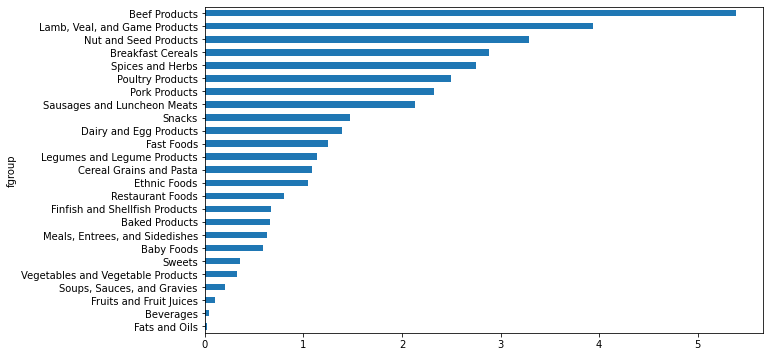

In [564]:
result['Zinc, Zn'].sort_values().plot(kind='barh');

In [566]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

get_maximum = lambda x: x.xs(x.value.idxmax()) 
get_minimum = lambda x: x.xs(x.value.idxmin())

max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

In [569]:
# make the food a little smaller 
max_foods.food = max_foods.food.str[:50]
max_foods.loc['Amino Acids']['food']

nutrient
Alanine                            Gelatins, dry powder, unsweetened
Arginine                                Seeds, sesame flour, low-fat
Aspartic acid                                    Soy protein isolate
Cystine                 Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                    Soy protein isolate
Glycine                            Gelatins, dry powder, unsweetened
Histidine                 Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINAL RE
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTERNAT
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTERNAT
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Native
Methionine                     Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTERNAT
Proline                            Gelatins, dry powder, unsweetened
Serine            Soy pro